# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# CNN Architecture
# TODO:
### What is a convolution? 
First lets go over what a convolution is. I will go over very basics in this notebook but if you want to read more I have a notebook on my github show casing what convolutions are and do. The notebook can be found [here](https://github.com/GaelGil/notebooks/blob/master/convolutions/convolutuionExample.ipynb). A convolution in math is when we combine two functions to get a third one. The convoulution of $example$ is given by $formula$. In a cnn we have a image and a kernel. So what our model will do is pass a kernel over the image to get another image. This is our convolution.


Feature extraction. During convolutions the filter is picking up on things from the image. For example lets say we have a photo of a the letter `X`. The filter would pick the diagonal lines on the image. During the convolution the filter would pick that up and pass it forward. This is feature extraction. The convolutions are getting us our features for us. This means that the convolutions are telling us what in this photo is significant. If we had an image of the letter `O`. The kernels would pick up on the curves of the letter and pass those forward. This will help us learn what is important in the `O`. Therefore getting us features which are important for our model to make a prediction. Features are data. For example in mnist our features are all the pixels in the image. In the .... dataset the is our features. So what convolutions do is get those for us. 



# TODO:
### What is a kernel?
A kernel is a 2D array that we use in a convoultion to get another image. If you have ever used a filter on social media to make a photo black and white or make it look like a drawing. It most likely uses a convolution to achive that. This is done by sliding our 2D array over our image and getting a new array. 

Here is an example of a kernel:
$$ kernel = \begin{bmatrix}
1 & 2\\
0 & 3
\end{bmatrix}
$$

Here is an example of a image. In this case we have one channel. If we had more channels for example if it was an rgb image. Then we would have two more matricies. In our case below this image can be thought of as a grayscale image:


$$ image = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$


Here is the convolution of the image and kernel:



# TODO:
### Max/Min Pooling
Max/Min Pooling is the proccess in which we go through our array in picking either the smallest or largest value in a nxn grid. This is
$$ image = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

$$ maxPoolImage = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

# TODO:
### How do we get a prediction from this?
Once we have the features what we do is pass them through a fully connected neural network. For example when using a neural network to solve MNIST you flatten the image to be 28x28=784. That would go into the input layer. The same is done for a CNN. Once the convolutions are done all the features we have are flattend and passed to a fully connected neural network. To learn more about fully connected networks check out my notebook on [github](https://github.com/GaelGil/notebooks/blob/master/back-propagation/back_propagation.ipynb). It goes over feeding forward and back propagation using MNIST.

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# TODO:
# Loading and Formating the Data
The data I will be using is a image dataset of dogs and cats that I got from [kaggle](https://www.kaggle.com/datasets/shaunthesheep/microsoft-catsvsdogs-dataset). The image consits of two folders one for dogs and one for cats. Each folder has 12499 photos for each class. I decided to use this dataset because I thought it would be cool to create a model where I can take a photo of my dog and it could classify it correctly.

Loading the data in is pretty simple. We simply use the `ImageFolder` function from pytorch and it loads it for us. One thing to mentione is that as we open it we want to do some transformations to the images. For example the transformations that I made to the dataset is resizing to 255x255, made them to tensors, and normalized it. Normalizing makes all pixel the values in the image to be within a rage. Instead of being in a range of 0-255 it is from 0-1. Normalizing the data helps with training.

In [3]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor(),
   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [25]:
DATA_PATH = './PetImages/'

In [26]:
data_set = ImageFolder(DATA_PATH, transform=TRANSFORM_IMG)
data_set

Dataset ImageFolder
    Number of datapoints: 24998
    Root location: ./PetImages/
    StandardTransform
Transform: Compose(
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [32]:
# get size of the entire dataset
len_data_set = len(data_set)

In [33]:
# get the size of train, validation, and test count
train_count = int(0.7 * len_data_set)
valid_count = int(0.2 * len_data_set)
test_count = len_data_set - train_count - valid_count

In [34]:
# split the data into train, validation and test sizes
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(data_set, (train_count, valid_count, test_count))

In [35]:
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

In [36]:
# get a batch from the train dataset
images, labels = next(iter(train_dataset_loader))

In [37]:
# functions to show an image
classes = ('cat', 'dog')
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(150,150))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


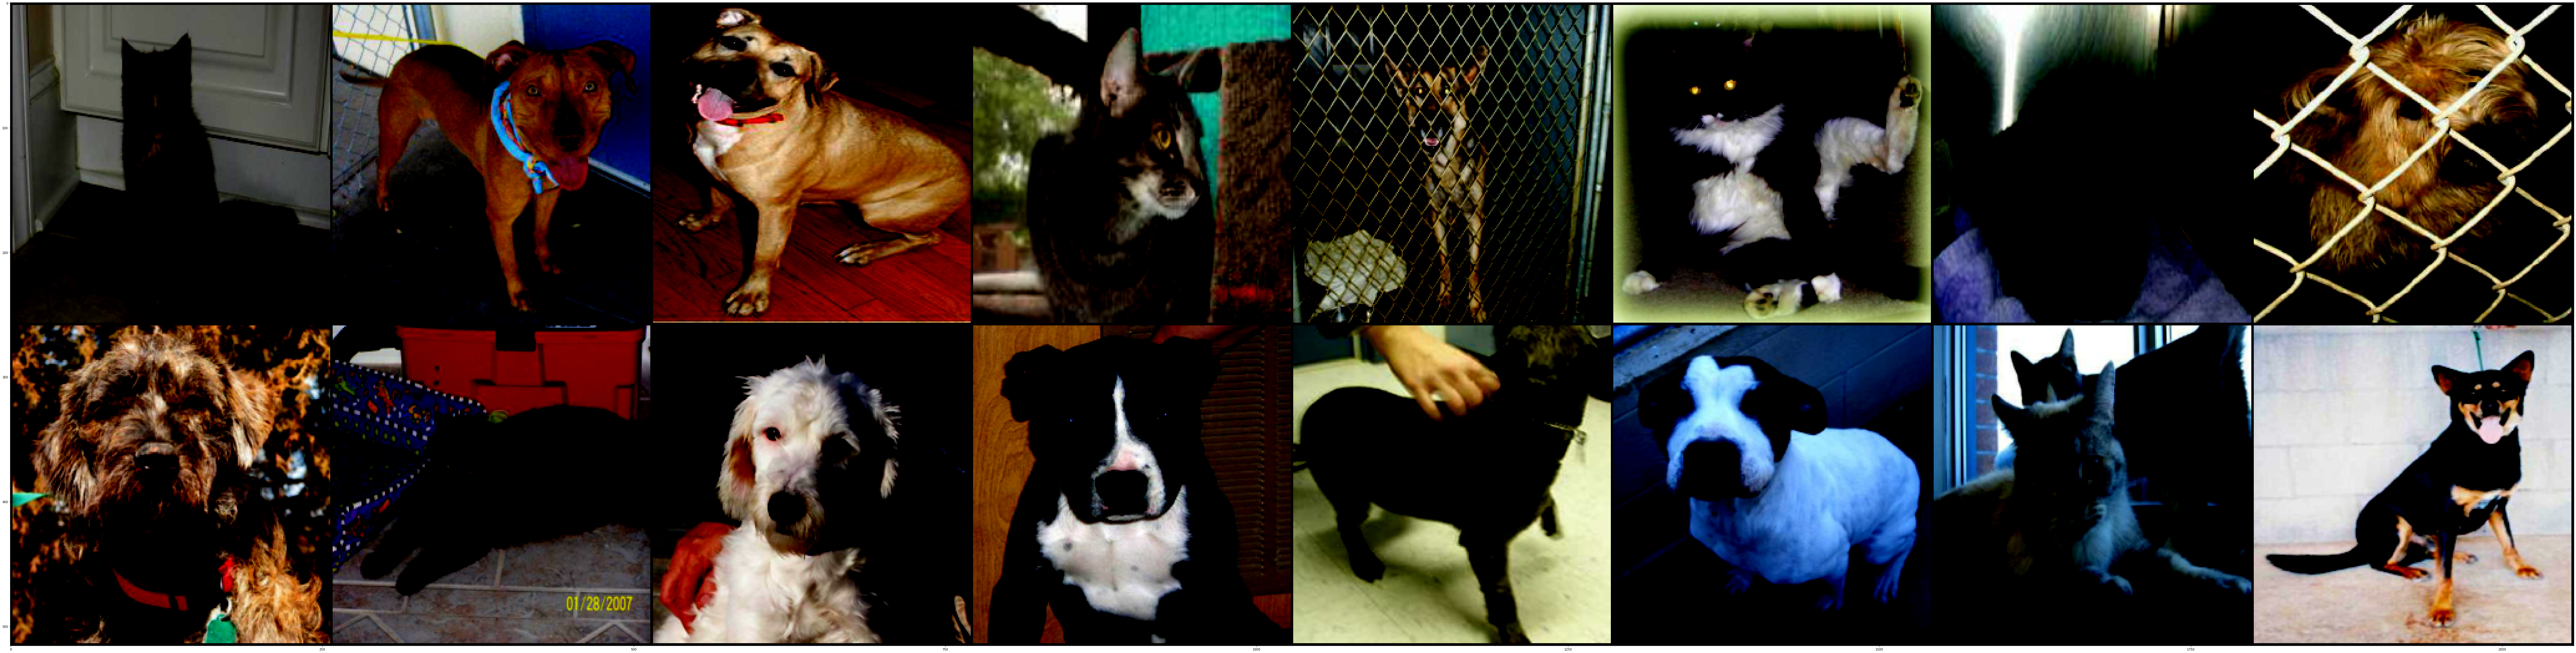

In [38]:
# show the images from our batch
imshow(torchvision.utils.make_grid(images))

# TODO:
# Creating the Model
Now that we have covered some basics we can go into the building the model. The model will have 3 convolutional layers. After each convolution there will be a linearization and a max pool layer of stride 2. The first convolutional layer will have three input channels because we are using rgb images. The output channels will be 6 and we will have a kernel size 5x5 (by default padding = 0 and stride=1). Our second convolutional layer will have six input channels because we previously had six output channels. Our kernel stays the same. Lastly our final convolutional layer will have 16 input channels and 32 output channels. 

Now we get into the the fully connected layers. 

In [40]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        # got the input for fc1 by passing a sample image
        self.fc1 = nn.Linear(32*28*28, 120)
        self.fc2 = nn.Linear(120, 1)

    def forward(self, x):
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv1(x)))
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv2(x)))
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv3(x)))
        # flatten our output from the convolutional layers
        x = torch.flatten(x, 1)
        # first fully connected layer
        x = self.fc1(x)
        # second fully 
        x = self.fc2(x)
        return  x

# TODO:
# Training the Model

In [65]:
def train(model, train_loader, optimizer, epochs):
    """
    Function to train our convolutinal neural network.
    Parameters:
    -----------
    model : class
        The model we are trying to train.
    train_loader : 
        The data for training.
    epochs : int
        How many iterations of training we are going to do.
    optimizer : class
        The optimizer for our network
    Returns:
    --------
    None
    """
    
    criterion = nn.BCEWithLogitsLoss()
    for epoch in range(epochs):
        losses = []
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            # turn the labels of the batch from [0, 1] to [[0], [1]]
            # also makes them floats
            labels = labels.unsqueeze(1).float()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
    
        print(f'Epoch: {epoch} ---- loss: {loss.item()}')
    return

In [61]:
# initialize the model
model = Net().to(device)
# set the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [66]:
# train the model
train(model=model, train_loader=train_dataset_loader, optimizer=optimizer, epochs=2)

Epoch: 0 ---- loss: 0.5070741772651672
Epoch: 1 ---- loss: 0.4088708460330963


# TODO:
# Analyzing Performence

In [ ]:
def test(model, test_loader):
    """
    Function to test our model.
    Parameters:
    -----------
    model : class
        The model we are trying to train.
    test_loader : 
        The data to test our model with.

    Returns:
    --------
    None
    """
    return

In [ ]:
test(model=model, test_loader=test_dataset_loader)

# TODO:
# What Does the CNN See?
- Show images of what the model is doing to the images as it passses through the network